## Implémentation d'autres méthodes d'integration numérique

### Méthode d'Euler implicite
$y_0 = y(a)$
$$ y_{k+1} = y_{k} + h F(y_{k+1}), \ pour \ k\in[0, n-2]$$
* Il n'est pas possible d'utiliser systématiquement la méthode d'Euler implicite car cette relation ne donne pas explicitement $y_{k+1}$ en fonction de $y_k$ (d’où son nom) et nécessite donc à chaque étape une résolution d’équation de la forme $\Phi(y_{k+1}) = 0$.

### Méthode de Heun
$y_0 = y(a)$
Pour $k \in[0, n-1]$
$$v_k = y_k + h F(t_k, y_k)$$
La réccurrence pour $k \in[0, n-2]$
$$y_{k+1} = y_k + h \left( \dfrac{F(t_k, y_k)}{2} + \dfrac{F(t_{k+1}, v_k)}{2} \right)$$
* Le terme $v_k$ représente la valeur approchée calculée par Euler. Ainsi, la méthode de Heun consiste à faire une moyenne entre la dérivée au temps $t_k$ et celle au temps $t_{k+1}$ en la valeur approchée calculée par Euler.

* On va implimenter ces méthodes et les tester avec $F(t,y) =y$, par exemple sur $[0,5]$ avec $y_0= 1$, la solution exacte est alors $t \mapsto exp (t)$.

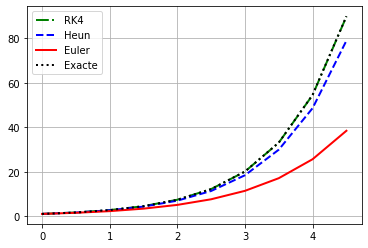

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def F(t, y):
    return y
def exact(t):
    return np.exp(t)
def Euler(a, b, h, y0, F):
    nsteps = int((b-a)/h)
    # initialisations
    t = np.zeros(nsteps) 
    y = np.zeros(nsteps)
    # Conditions initiales
    t[0] = a
    y[0] = y0
    # Algorithme : Euler
    for k in range(nsteps-1):
        t[k+1] = t[k]+h
        y[k+1] = y[k] + h*F(t[k], y[k])
    return t, y
def Heun(a, b, h, y0, F):
    nsteps = int((b-a)/h)
    # initialisations
    t = np.zeros(nsteps) 
    y = np.zeros(nsteps)
    # Conditions initiales
    t[0] = a
    y[0] = y0
    # Algorithme : Heun
    for k in range(nsteps-1):
        t[k+1] = t[k]+h
        y[k+1] = y[k] + h*(F(t[k],y[k])/2 + \
                           F(t[k+1], y[k]+h*F(t[k],y[k]))/2)
    return t, y
def RK4(a, b, h, y0, F):
    nsteps = int((b-a)/h)
    # initialisations
    t = np.zeros(nsteps) 
    y = np.zeros(nsteps)
    # Conditions initiales
    t[0] = a
    y[0] = y0
    # Algorithme : RK4
    for k in range(nsteps-1):
        t[k+1] = t[k]+h
        A = F(t[k], y[k]) # Euler
        B = F(t[k]+h/2, y[k] + h*A/2) # alpha_k
        C = F(t[k]+h/2, y[k] + h*B/2) # beta_k
        D = F(t[k]+h/2, y[k] + h*C)   # gamma_k
        y[k+1] = y[k] + (h/6)*(A +2*B + 2*C + D)
    return t, y
# Plot
a, b, h = 0, 5, 0.5
y0 = 1
t_e, y_e = Euler(a, b, h, y0, F)
t_h, y_h = Heun(a, b, h, y0, F)
t_rk4, y_rk4 = RK4(a, b, h, y0, F)
plt.plot(t_rk4,y_rk4,'g-.',linewidth=2,label='RK4')
plt.plot(t_h,y_h,'b--',linewidth=2,label='Heun')
plt.plot(t_e,y_e,'r-',linewidth=2,label='Euler')
plt.plot(t_e,exact(t_e),'k:',linewidth=2,label='Exacte')
plt.legend()
plt.grid()
plt.show()


## Equation différentielles du second ordre


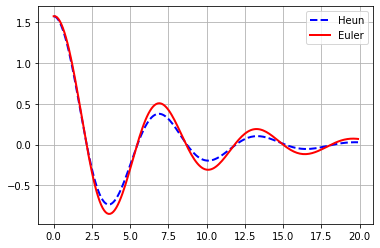

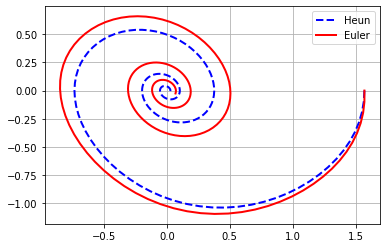

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def G(t, x):
    return np.array([x[1],-np.sin(x[0])-0.4*x[1]])
def Euler(a, b, h, x0, G):
    nsteps = int((b-a)/h)
    # initialisations
    t = np.zeros(nsteps)
    x = np.zeros((2, nsteps))
    # Conditions initiales
    t[0] = a
    x[:,0] = x0
    # Algorithme : Euler
    for k in range(nsteps-1):
        t[k+1] = t[k]+h
        x[:,k+1] = x[:,k] + h*G(t[k], x[:,k])
    return t, x
def Heun(a, b, h, x0, G):
    nsteps = int((b-a)/h)
    # initialisations
    t = np.zeros(nsteps)
    x = np.zeros((2, nsteps))
    # Conditions initiales
    t[0] = a
    x[:,0] = x0
    # Algorithme : Heun
    for k in range(nsteps-1):
        t[k+1] = t[k]+h
        x[:,k+1] = x[:,k] + h*(G(t[k],x[:,k])/2 + \
                           G(t[k+1], x[:,k]+h*G(t[k],x[:,k]))/2)
    return t, x

# Plot
a, b, h = 0, 20, 0.1
x0 = np.array([np.pi/2, 0])
t_e, x_e = Euler(a, b, h, x0, G)
t_h, x_h = Heun(a, b, h, x0, G)
# Oscillation
plt.figure()
plt.plot(t_h,x_h[0],'b--',linewidth=2,label='Heun')
plt.plot(t_e,x_e[0],'r-',linewidth=2,label='Euler')
plt.legend()
plt.grid()
plt.show()
# Diagramme de Phase
plt.figure()
plt.plot(x_h[0],x_h[1],'b--',linewidth=2,label='Heun')
plt.plot(x_e[0],x_e[1],'r-',linewidth=2,label='Euler')
plt.legend()
plt.grid()
plt.show()